In [1]:
#DATA CLEANING
import pandas as pd
df = pd.read_csv("loan_approval_dataset.csv")

In [2]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
print("Original dataframe shape",df.shape)

Original dataframe shape (4269, 13)


In [4]:
print("Data types:\n", df.dtypes)

Data types:
 loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
#Clean spaces in column names
df.columns = df.columns.str.strip()

In [7]:
#Clean spaces in categorical column values
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

In [8]:
# Convert target ['loan_status'] variable to binary
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [9]:
# Check if null values remain after mapping
print("Null values in loan_status:", df['loan_status'].isna().sum())

Null values in loan_status: 0


In [10]:
# Apply One-Hot Encoding to categorical variables (without a reference column)
df = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)

In [11]:
# --- ADVANCED FEATURE ENGINEERING ---

# 1. Estimated monthly income
df["monthly_income"] = df["income_annum"] / 12

# 2. Monthly loan amount
df["monthly_loan_payment"] = df["loan_amount"] / df["loan_term"]

# 3. Monthly payment-income ratio (monthly debt to monthly income)
df["debt_to_income_ratio"] = df["monthly_loan_payment"] / df["monthly_income"]

# 4. Total luxury assets per total assets (risk of unnecessary spending) % of spend in luxury
df["total_assets"] = df["residential_assets_value"]+ df["commercial_assets_value"]+ df["luxury_assets_value"] + df["bank_asset_value"]
df["luxury_asset_ratio"] = df["luxury_assets_value"] / df["total_assets"]

# 5. Average asset value (divided among the 4 categories)
df["avg_asset_value"] = df["total_assets"] / 4

# 6. CIBIL score range (numerical conversion to ordinal category)
df["cibil_band"] = pd.cut(df["cibil_score"],
                          bins=[0, 400, 600, 750, 900],
                          labels=["Poor", "Fair", "Good", "Excellent"])

# 7. One-Hot Encoding of the New Ordinal Column
df = pd.get_dummies(df, columns=["cibil_band"], drop_first=True)

# Show the new added columns
df[[
    "monthly_income",
    "monthly_loan_payment",
    "debt_to_income_ratio",
    "luxury_asset_ratio",
    "avg_asset_value"
]].head()

,monthly_income,monthly_loan_payment,debt_to_income_ratio,luxury_asset_ratio,avg_asset_value
0,800000.000000,2.491667e+06,3.114583,0.447732,12675000.0
1,341666.666667,1.525000e+06,4.463415,0.517647,4250000.0
2,758333.333333,1.485000e+06,1.958242,0.577123,14425000.0
3,683333.333333,3.837500e+06,5.615854,0.442125,13175000.0
4,816666.666667,1.210000e+06,1.481633,0.534545,13750000.0


In [12]:
df["monthly_income"] = df["monthly_income"].round(2)
df["monthly_loan_payment"] = df["monthly_loan_payment"].round(2)
df["debt_to_income_ratio"] = df["debt_to_income_ratio"].round(2)
df["luxury_asset_ratio"] = df["luxury_asset_ratio"].round(3)
df["avg_asset_value"] = df["avg_asset_value"].round(2)

## Display the first rows with formatted values

df[[
    "monthly_income",
    "monthly_loan_payment",
    "debt_to_income_ratio",
    "luxury_asset_ratio",
    "avg_asset_value"
]].head()

,monthly_income,monthly_loan_payment,debt_to_income_ratio,luxury_asset_ratio,avg_asset_value
0,800000.00,2491666.67,3.11,0.448,12675000.0
1,341666.67,1525000.00,4.46,0.518,4250000.0
2,758333.33,1485000.00,1.96,0.577,14425000.0
3,683333.33,3837500.00,5.62,0.442,13175000.0
4,816666.67,1210000.00,1.48,0.535,13750000.0


In [13]:
df.columns.tolist()

['loan_id',
 'no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status',
 'education_Not Graduate',
 'self_employed_Yes',
 'monthly_income',
 'monthly_loan_payment',
 'debt_to_income_ratio',
 'total_assets',
 'luxury_asset_ratio',
 'avg_asset_value',
 'cibil_band_Fair',
 'cibil_band_Good',
 'cibil_band_Excellent']

In [14]:
# Exclude columns that should not be used as input
X = df.drop(columns=["loan_id", "loan_status"])

# target variable
y = df["loan_status"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Variable scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

📊 Random Forest Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       323
           1       0.99      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      0.99      1.00       854
weighted avg       1.00      1.00      1.00       854



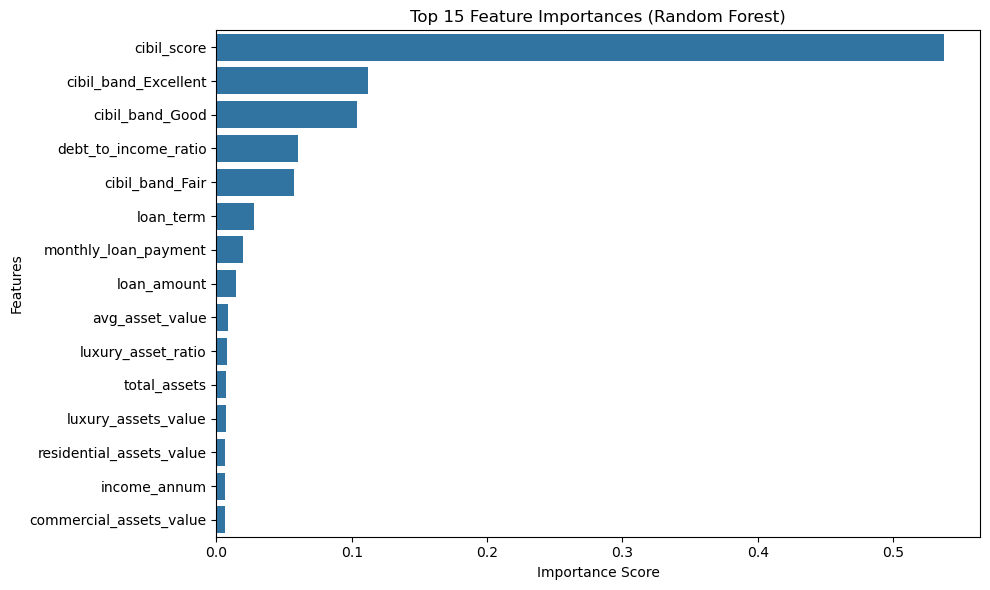

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# Predictions
y_pred = rf.predict(X_test)

# Assessment
print("📊 Random Forest Report:\n")
print(classification_report(y_test, y_pred))

# Importance of variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False).head(15)


# View
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted, y=importances_sorted.index)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()